# Overall

```
- 프로젝트명 : 축구선수 이적시장 데이터 분석
- 프로젝트유형 : EDA, 시계열 분석, 상관분석
- 시나리오 : 축구선수 평균 연봉의 시기별 트렌드 분석 및, 다른 특성과의 상관성 분석 수행
- 분석방향
    - 축구선수 평균 연봉 트랜드 분석
        - 평균 연봉 분포
        - 연도별 총합, 최고, 최저 평균 연봉 분석
        - 연도별 선수 수 변화 트랜드
        - 연도별 축구선수 평균 연봉 분포
    - 축구선수 평균 연봉과 변수별 상관성
        - 나이 & 평균 연봉
        - 포지션 & 평균 연봉
- DATA
    - title : Football Data from Transfermarkt
    - dataset : https://www.kaggle.com/datasets/davidcariboo/player-scores
- Meta data
    - player_id : 선수 고유 ID
    - first_name : 선수 이름 (이름 부분)
    - last_name : 선수 성 (성씨 부분)
    - name : 선수 전체 이름
    - last_season : 마지막 활동한 시즌
    - current_club_id : 현재 소속 구단 ID
    - player_code : 선수 식별용 코드
    - country_of_birth : 출생 국가
    - city_of_birth : 출생 도시
    - country_of_citizenship : 국적
    - date_of_birth : 생년월일
    - sub_position : 세부 포지션 (예: Left Winger 등)
    - position : 주요 포지션 (예: Forward, Midfielder 등)
```

<!--
    250522 : https://www.kaggle.com/datasets/davidcariboo/player-scores
    practice_pandas : https://colab.research.google.com/drive/1248C8U63jjjiKMOoxs6eAJBQj-1zYGAm
    practice_football : https://colab.research.google.com/drive/123LnZ9CiEW36boT1HK1PkXfc0VEGY21i
    practice_matplotlib : https://colab.research.google.com/drive/121yHI6zdjF-SzvGIyznwiT_Tnwg-dkcO

 -->

# Library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install koreanize_matplotlib
import koreanize_matplotlib
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.4 MB/s eta 0:00:00


# Data Import

In [ ]:
from google.colab import files
files.upload()  # 새로 다운로드한 kaggle.json 업로드

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [ ]:
# title : Football Data from Transfermarkt
# dataset : https://www.kaggle.com/datasets/davidcariboo/player-scores
!kaggle datasets download -d davidcariboo/player-scores


Dataset URL: https://www.kaggle.com/datasets/davidcariboo/player-scores
License(s): CC0-1.0
 67% 110M/165M [00:00<00:00, 1.15GB/s]
100% 165M/165M [00:00<00:00, 921MB/s] 


In [ ]:
!unzip /content/player-scores.zip


Archive:  /content/player-scores.zip
  inflating: appearances.csv         
  inflating: club_games.csv          
  inflating: clubs.csv               
  inflating: competitions.csv        
  inflating: game_events.csv         
  inflating: game_lineups.csv        
  inflating: games.csv               
  inflating: player_valuations.csv   
  inflating: players.csv             
  inflating: transfers.csv           


In [ ]:
df1 = pd.read_csv("/content/players.csv")
df1.head(3)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,...,foot,height_in_cm,contract_expiration_date,agent_name,image_url,url,current_club_domestic_competition_id,current_club_name,market_value_in_eur,highest_market_value_in_eur
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,...,right,184.0,NaN,ASBW Sport Marketing,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/miroslav-klose...,IT1,Società Sportiva Lazio S.p.A.,1000000.0,30000000.0
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,...,left,190.0,NaN,Neubauer 13 GmbH,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/roman-weidenfe...,L1,Borussia Dortmund,750000.0,8000000.0
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,...,NaN,NaN,NaN,CSKA-AS-23 Ltd.,https://img.a.transfermarkt.technology/portrai...,https://www.transfermarkt.co.uk/dimitar-berbat...,GR1,Panthessalonikios Athlitikos Omilos Konstantin...,1000000.0,34500000.0


In [ ]:
df2 = pd.read_csv("/content/player_valuations.csv")
df2.head(3)


,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   player_id                             32601 non-null  int64  
 1   first_name                            30539 non-null  object 
 2   last_name                             32601 non-null  object 
 3   name                                  32601 non-null  object 
 4   last_season                           32601 non-null  int64  
 5   current_club_id                       32601 non-null  int64  
 6   player_code                           32601 non-null  object 
 7   country_of_birth                      29802 non-null  object 
 8   city_of_birth                         30146 non-null  object 
 9   country_of_citizenship                32218 non-null  object 
 10  date_of_birth                         32554 non-null  object 
 11  sub_position   

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496606 entries, 0 to 496605
Data columns (total 5 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   player_id                            496606 non-null  int64 
 1   date                                 496606 non-null  object
 2   market_value_in_eur                  496606 non-null  int64 
 3   current_club_id                      496606 non-null  int64 
 4   player_club_domestic_competition_id  496606 non-null  object
dtypes: int64(3), object(2)
memory usage: 18.9+ MB


In [ ]:
display(
    df1.isna().sum()
    , df2.isna().sum() # 결측치 없음
 )


,0
player_id,0
first_name,2062
last_name,0
name,0
last_season,0
current_club_id,0
player_code,0
country_of_birth,2799
city_of_birth,2455
country_of_citizenship,383


,0
player_id,0
date,0
market_value_in_eur,0
current_club_id,0
player_club_domestic_competition_id,0


In [ ]:
# 필요 컬럼 선별

df1.columns
columns = ['player_id', 'first_name', 'last_name', 'name', 'last_season', 'current_club_id', 'player_code', 'country_of_birth', 'city_of_birth', 'country_of_citizenship', 'date_of_birth', 'sub_position', 'position']

df1 = df1[columns]
df1.head(3)

,player_id,first_name,last_name,name,last_season,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position
0,10,Miroslav,Klose,Miroslav Klose,2015,398,miroslav-klose,Poland,Opole,Germany,1978-06-09 00:00:00,Centre-Forward,Attack
1,26,Roman,Weidenfeller,Roman Weidenfeller,2017,16,roman-weidenfeller,Germany,Diez,Germany,1980-08-06 00:00:00,Goalkeeper,Goalkeeper
2,65,Dimitar,Berbatov,Dimitar Berbatov,2015,1091,dimitar-berbatov,Bulgaria,Blagoevgrad,Bulgaria,1981-01-30 00:00:00,Centre-Forward,Attack


In [ ]:
print(df1.info())
display(df1.isna().sum())
df1.dropna(inplace = True)
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32601 entries, 0 to 32600
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   player_id               32601 non-null  int64 
 1   first_name              30539 non-null  object
 2   last_name               32601 non-null  object
 3   name                    32601 non-null  object
 4   last_season             32601 non-null  int64 
 5   current_club_id         32601 non-null  int64 
 6   player_code             32601 non-null  object
 7   country_of_birth        29802 non-null  object
 8   city_of_birth           30146 non-null  object
 9   country_of_citizenship  32218 non-null  object
 10  date_of_birth           32554 non-null  object
 11  sub_position            32421 non-null  object
 12  position                32601 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.2+ MB
None


,0
player_id,0
first_name,2062
last_name,0
name,0
last_season,0
current_club_id,0
player_code,0
country_of_birth,2799
city_of_birth,2455
country_of_citizenship,383


<class 'pandas.core.frame.DataFrame'>
Index: 27726 entries, 0 to 32595
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   player_id               27726 non-null  int64 
 1   first_name              27726 non-null  object
 2   last_name               27726 non-null  object
 3   name                    27726 non-null  object
 4   last_season             27726 non-null  int64 
 5   current_club_id         27726 non-null  int64 
 6   player_code             27726 non-null  object
 7   country_of_birth        27726 non-null  object
 8   city_of_birth           27726 non-null  object
 9   country_of_citizenship  27726 non-null  object
 10  date_of_birth           27726 non-null  object
 11  sub_position            27726 non-null  object
 12  position                27726 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.0+ MB
None


# Data Preprocessing
- 데이터셋 정보 확인
- 특정 컬럼 값만 확인
- 결측치 확인
- 결측치 처리



# Descriptive Statistics


In [ ]:
def count_value(df, column):
    count = len(df[column].unique())
    print(f'Total {column}: {count}')

columns = ['player_id', 'current_club_id', 'country_of_citizenship']

for column in columns:
    count_value(df1, column)

Total player_id: 27726
Total current_club_id: 437
Total country_of_citizenship: 183


In [ ]:
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리까지 띄우겠다
df2.describe()

,player_id,market_value_in_eur,current_club_id
count,496606.000,496606.000,496606.000
mean,224411.570,2471144.918,4428.745
std,207007.253,6983759.321,10940.783
min,10.000,0.000,3.000
25%,58957.000,200000.000,369.000
50%,164902.000,500000.000,1025.000
75%,334042.000,1700000.000,2995.000
max,1310513.000,200000000.000,110302.000


In [ ]:
df2.describe(include = 'object')

,date,player_club_domestic_competition_id
count,496606,496606
unique,5316,14
top,2020-04-08,TR1
freq,10478,56212


In [ ]:
df2['market_value_in_eur'].mean()

mean_ = df2['market_value_in_eur'].mean()
over_mean = len(df2[df2['market_value_in_eur'] > mean_])
total = len(df2)
print(f"percentile of player over mean value: {over_mean/total*100:.2f}%")


percentile of player over mean value: 20.17%


In [ ]:
# DataFrame merge


# DataFrame Merge

In [ ]:
players_with_val = pd.merge(df1, df2, on = "player_id")
# players_with_val[players_with_val['last_name'] == 'Son']

In [ ]:
# date 컬럼에서 year 만 추출
players_with_val['dateyear'] = players_with_val['date'].apply(lambda x : int(x[:4]))

In [ ]:
# 나이 컬럼
players_with_val['age'] = players_with_val['dateyear'] - players_with_val['date_of_birth'].apply(lambda x: int(x[:4]))

In [ ]:
# 연봉 변동사항 중 가장 최신의 데이터만 남기고 모두 drop
players_with_val.drop_duplicates(['player_id', 'dateyear'], keep='last', inplace=True)
players_with_val[players_with_val['last_name'] == 'Son']

,player_id,first_name,last_name,name,last_season,current_club_id_x,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,date,market_value_in_eur,current_club_id_y,player_club_domestic_competition_id,dateyear,age
159153,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2010-11-23,1500000,148,GB1,2010,18
159156,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2011-08-15,4500000,148,GB1,2011,19
159159,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2012-10-26,8000000,148,GB1,2012,20
159162,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2013-06-30,14000000,148,GB1,2013,21
159163,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2014-07-10,14000000,148,GB1,2014,22
159166,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2015-10-14,25000000,148,GB1,2015,23
159168,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2016-08-01,25000000,148,GB1,2016,24
159170,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2017-06-28,30000000,148,GB1,2017,25
159173,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2018-12-19,50000000,148,GB1,2018,26
159176,91845,Heung-min,Son,Heung-min Son,2024,148,heung-min-son,"Korea, South","Chuncheon, Gangwon","Korea, South",1992-07-08 00:00:00,Left Winger,Attack,2019-12-10,80000000,148,GB1,2019,27


In [ ]:
players_with_val.columns

Index(['player_id', 'first_name', 'last_name', 'name', 'last_season',
       'current_club_id_x', 'player_code', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'date', 'market_value_in_eur', 'current_club_id_y',
       'player_club_domestic_competition_id', 'dateyear', 'age'],
      dtype='object')

In [ ]:
# 필요한 컬럼 추출
columns = [
    'player_id', 'current_club_id_y', 'first_name', 'last_name', 'name', 'last_season', 'country_of_citizenship', 'city_of_birth', 'position', 'sub_position', 'dateyear', 'age', 'market_value_in_eur']
players_with_val = players_with_val[columns]

players_with_val.rename(
    columns={"current_club_id_y": "current_club_id"},
    inplace=True
)

players_with_val.head(3)

<ipython-input-42-24dddef36090>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_with_val.rename(


,player_id,current_club_id,first_name,last_name,name,last_season,country_of_citizenship,city_of_birth,position,sub_position,dateyear,age,market_value_in_eur
0,10,398,Miroslav,Klose,Miroslav Klose,2015,Germany,Opole,Attack,Centre-Forward,2004,26,7000000
3,10,398,Miroslav,Klose,Miroslav Klose,2015,Germany,Opole,Attack,Centre-Forward,2005,27,15000000
5,10,398,Miroslav,Klose,Miroslav Klose,2015,Germany,Opole,Attack,Centre-Forward,2006,28,30000000


In [ ]:
players_with_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225632 entries, 0 to 445803
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   player_id               225632 non-null  int64 
 1   current_club_id         225632 non-null  int64 
 2   first_name              225632 non-null  object
 3   last_name               225632 non-null  object
 4   name                    225632 non-null  object
 5   last_season             225632 non-null  int64 
 6   country_of_citizenship  225632 non-null  object
 7   city_of_birth           225632 non-null  object
 8   position                225632 non-null  object
 9   sub_position            225632 non-null  object
 10  dateyear                225632 non-null  int64 
 11  age                     225632 non-null  int64 
 12  market_value_in_eur     225632 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 24.1+ MB


In [ ]:
# dateyear 가 2022, last_season 이 2022인 데이터만 sort
players_with_val_2022 = players_with_val[(players_with_val['dateyear'] == 2022) & (players_with_val['last_season'] == 2022)]
players_with_val_2022
# 몸값 순위 컬럼 추가
## method = "min" : 중복값을 어떻게 처리할 것인가?
##
players_with_val_2022['market_value_rank'] = players_with_val_2022['market_value_in_eur'].rank(method="min", ascending=False)

<ipython-input-47-8accc0ad0746>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_with_val_2022['market_value_rank'] = players_with_val_2022['market_value_in_eur'].rank(method="min", ascending=False)


In [ ]:
players_with_val_2022.sort_values(by = 'market_value_rank', ascending = True)

,player_id,current_club_id,first_name,last_name,name,last_season,country_of_citizenship,city_of_birth,position,sub_position,dateyear,age,market_value_in_eur,market_value_rank
258009,200512,27,Sadio,Mané,Sadio Mané,2022,Senegal,Bambaly,Attack,Left Winger,2022,30,60000000,1.000
170584,102558,583,Marco,Verratti,Marco Verratti,2022,Italy,Pescara,Midfield,Central Midfield,2022,30,50000000,2.000
47182,28003,583,Lionel,Messi,Lionel Messi,2022,Argentina,Rosario,Attack,Right Winger,2022,35,50000000,2.000
273930,225161,543,Rúben,Neves,Rúben Neves,2022,Portugal,Santa Maria da Feira,Midfield,Defensive Midfield,2022,25,40000000,4.000
216699,156617,46,Marcelo,Brozovic,Marcelo Brozovic,2022,Croatia,Zagreb,Midfield,Defensive Midfield,2022,30,35000000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397000,488849,3725,Abubakar,Kadyrov,Abubakar Kadyrov,2022,Russia,"Tsentoroy, Chechnya Republic",Attack,Centre-Forward,2022,26,25000,1641.000
382147,432763,18105,Ivijan,Svrznjak,Ivijan Svrznjak,2022,Croatia,Koprivnica,Midfield,Attacking Midfield,2022,21,25000,1641.000
411165,557412,467,Guus,Gertsen,Guus Gertsen,2022,Netherlands,Bemmel,Defender,Centre-Back,2022,19,25000,1641.000
377405,417239,26459,Artem,Danylyuk,Artem Danylyuk,2022,Ukraine,Rivne,Defender,Left-Back,2022,21,25000,1641.000


# Analysis

## Trend of football player's value

### Distribution of player's value

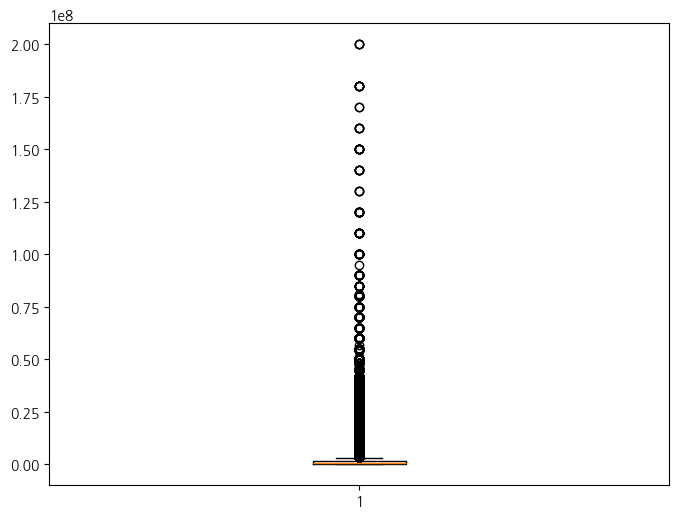

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.boxplot(players_with_val['market_value_in_eur'])
plt.show()

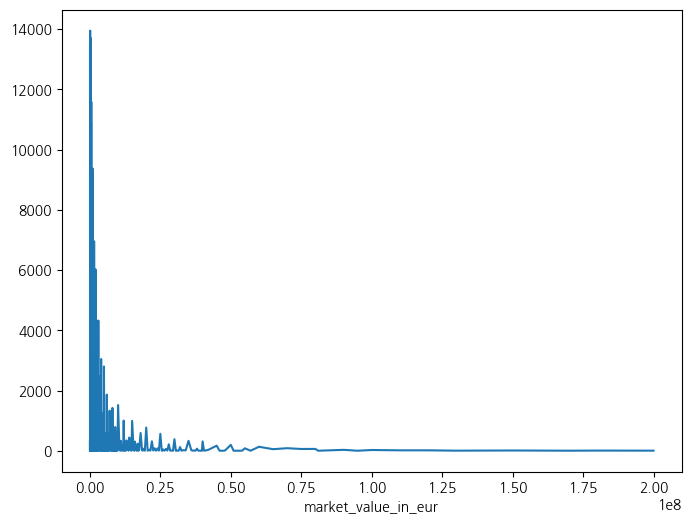

In [ ]:
plt.figure(figsize=(8,6))
players_with_val.groupby('market_value_in_eur')['player_id'].count().plot()
plt.show()

### Trend per year - sum

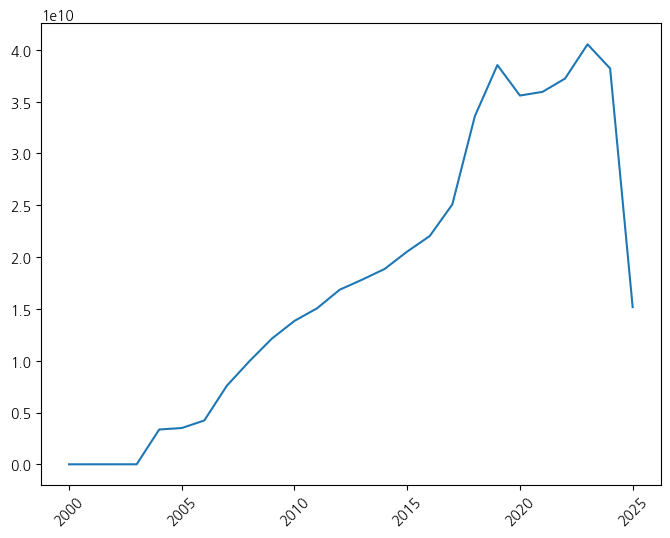

In [ ]:
sum_per_year = players_with_val.groupby('dateyear')['market_value_in_eur'].sum()
x = sum_per_year.index
y = sum_per_year.values

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xticks(rotation=45)
plt.show()

### Trend per year - max

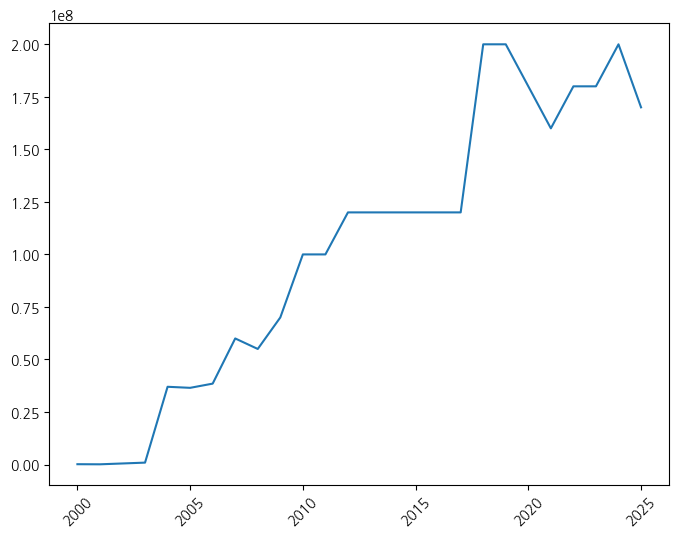

In [ ]:
max_per_year = players_with_val.groupby('dateyear')['market_value_in_eur'].max()
x = max_per_year.index
y = max_per_year.values

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xticks(rotation=45)
plt.show()

### Trend per year - mean

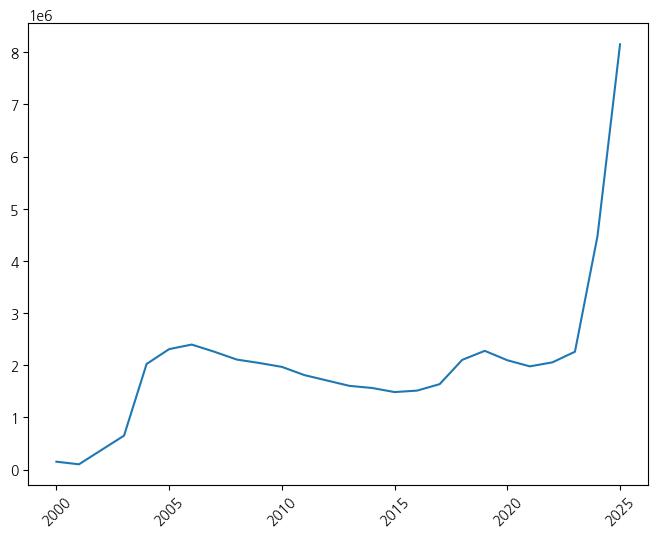

In [ ]:
mean_per_year = players_with_val.groupby('dateyear')['market_value_in_eur'].mean()
x = mean_per_year.index
y = mean_per_year.values

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.xticks(rotation=45)
plt.show()

### Trend of amount of players - count

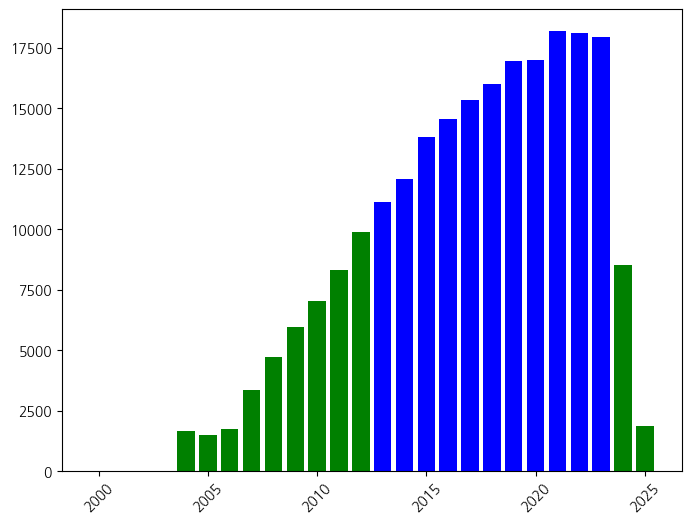

In [ ]:
y = players_with_val.groupby('dateyear')['player_id'].count()

colors = ['blue' if count > 10000 else 'green' for count in y]

plt.figure(figsize=(8,6))
plt.bar(x, y, color=colors)
plt.xticks(rotation=45)
plt.show()


In [ ]:
players_with_val = players_with_val[(players_with_val['dateyear'] >= 2013) & (players_with_val['dateyear'] < 2023)]

### Distribution of players value - year

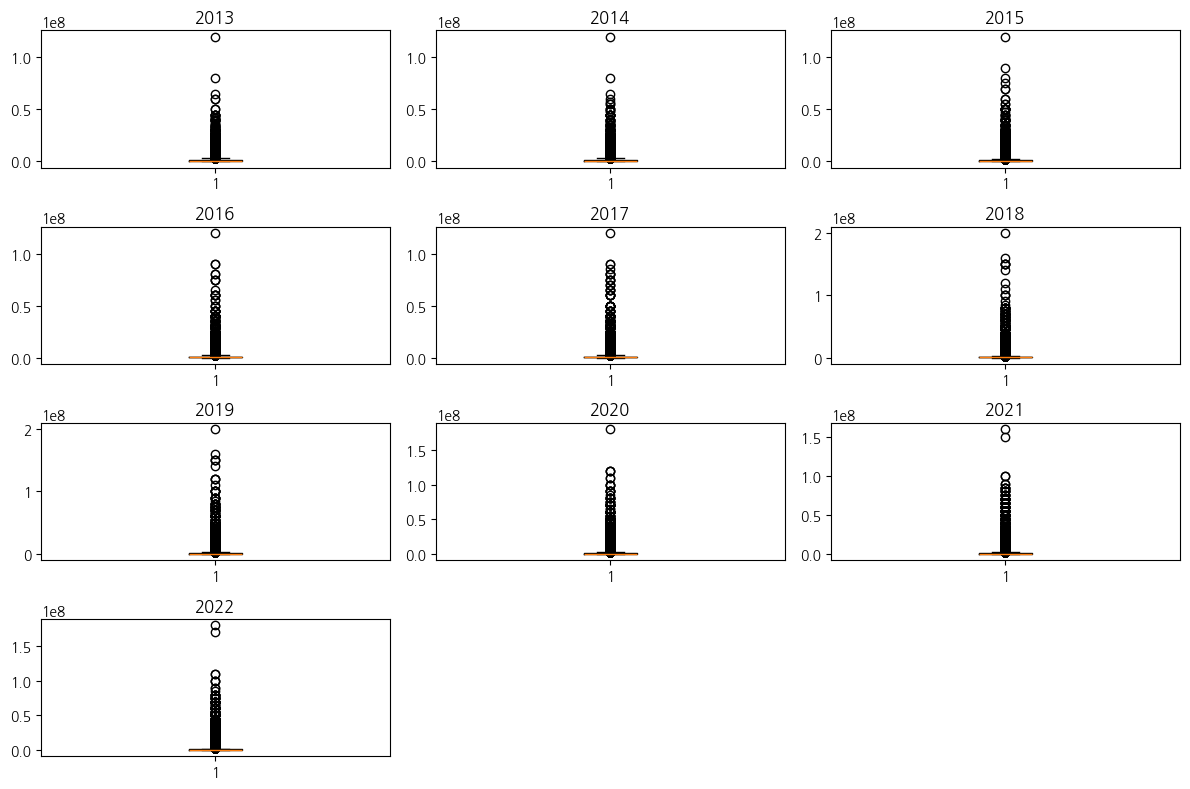

In [ ]:
years = sorted(players_with_val['dateyear'].unique())

num_plots = len(years)
num_rows = 4
num_cols = (num_plots + 3) // 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, year in enumerate(years):
    market_values = players_with_val[players_with_val['dateyear'] == year]['market_value_in_eur'].values

    ax = axes[i]
    ax.boxplot(market_values)
    ax.set_title(year)

for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

# 축구선수 몸값과 변수별 상관성 살펴보기

## Age & 평균 연봉

In [ ]:
# Age
players_with_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153093 entries, 17 to 445176
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   player_id               153093 non-null  int64 
 1   current_club_id         153093 non-null  int64 
 2   first_name              153093 non-null  object
 3   last_name               153093 non-null  object
 4   name                    153093 non-null  object
 5   last_season             153093 non-null  int64 
 6   country_of_citizenship  153093 non-null  object
 7   city_of_birth           153093 non-null  object
 8   position                153093 non-null  object
 9   sub_position            153093 non-null  object
 10  dateyear                153093 non-null  int64 
 11  age                     153093 non-null  int64 
 12  market_value_in_eur     153093 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 16.4+ MB


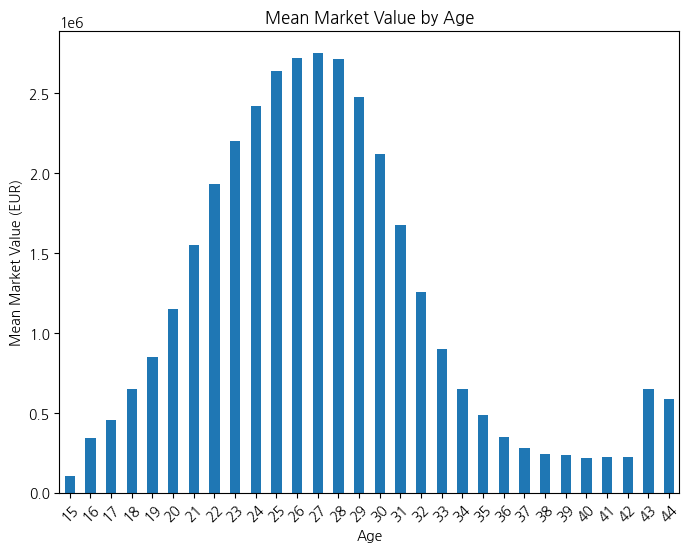

In [ ]:
age_market_values = players_with_val.groupby('age')['market_value_in_eur'].mean()

plt.figure(figsize=(8, 6))
age_market_values.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Mean Market Value (EUR)')
plt.title('Mean Market Value by Age')
plt.xticks(rotation=45)
plt.show()

In [ ]:
display(players_with_val.groupby('age').count())

,player_id,current_club_id,first_name,last_name,name,last_season,country_of_citizenship,city_of_birth,position,sub_position,dateyear,market_value_in_eur
age,,,,,,,,,,,,
15,21,21,21,21,21,21,21,21,21,21,21,21
16,367,367,367,367,367,367,367,367,367,367,367,367
17,1952,1952,1952,1952,1952,1952,1952,1952,1952,1952,1952,1952
18,4708,4708,4708,4708,4708,4708,4708,4708,4708,4708,4708,4708
19,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665,8665
20,10768,10768,10768,10768,10768,10768,10768,10768,10768,10768,10768,10768
21,11551,11551,11551,11551,11551,11551,11551,11551,11551,11551,11551,11551
22,11795,11795,11795,11795,11795,11795,11795,11795,11795,11795,11795,11795
23,11573,11573,11573,11573,11573,11573,11573,11573,11573,11573,11573,11573


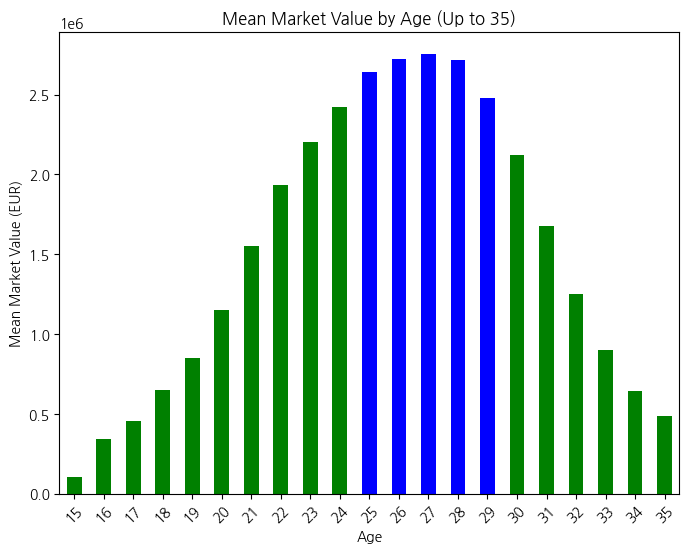

In [ ]:
filtered_data = players_with_val[players_with_val['age'] <= 35]

age_market_values = filtered_data.groupby('age')['market_value_in_eur'].mean()

sorted_values = age_market_values.sort_values(ascending=False) # 연령별 top 5 최고 value 만 추출

top_5_intervals = sorted_values.head(5).index # top 5 index

colors = ['blue' if age in top_5_intervals else 'green' for age in age_market_values.index]

plt.figure(figsize=(8, 6))
age_market_values.plot(kind='bar', color=colors)
plt.xlabel('Age')
plt.ylabel('Mean Market Value (EUR)')
plt.title('Mean Market Value by Age (Up to 35)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-72-9fe7a5417506>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_players = filtered_data.groupby('age').apply(lambda x: x.loc[x['market_value_in_eur'].idxmax()]['name'])


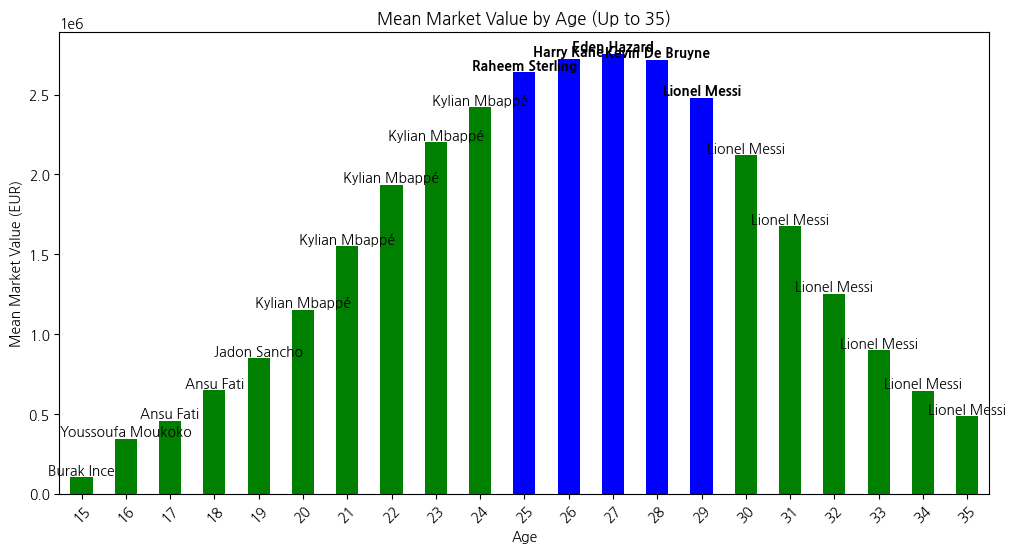

In [ ]:
top_players = filtered_data.groupby('age').apply(lambda x: x.loc[x['market_value_in_eur'].idxmax()]['name'])
# x['market_value_in_eur'].idxmax() : 몸값이 가장 높은 인덱스
# x.loc[x['market_value_in_eur'].idxmax() 몸값이 가장 높은 인덱스를 가진 행
# x.loc[x['market_value_in_eur'].idxmax()]['name'] 몸값이 가장 높은 인덱스를 가진 행에서 이름을 추출

plt.figure(figsize=(12, 6))
age_market_values.plot(kind='bar', color=colors)
plt.xlabel('Age')
plt.ylabel('Mean Market Value (EUR)')
plt.title('Mean Market Value by Age (Up to 35)')

for i, value in enumerate(age_market_values):
    age = age_market_values.index[i]
    top_player = top_players[age]
    if age in sorted_values.head().index:
        plt.text(i, value, top_player, ha='center', va='bottom', color='black', fontweight='bold')
    else:
        plt.text(i, value, top_player, ha='center', va='bottom', color='black')

plt.xticks(rotation=45)
plt.show()

## Position & 평균 연봉

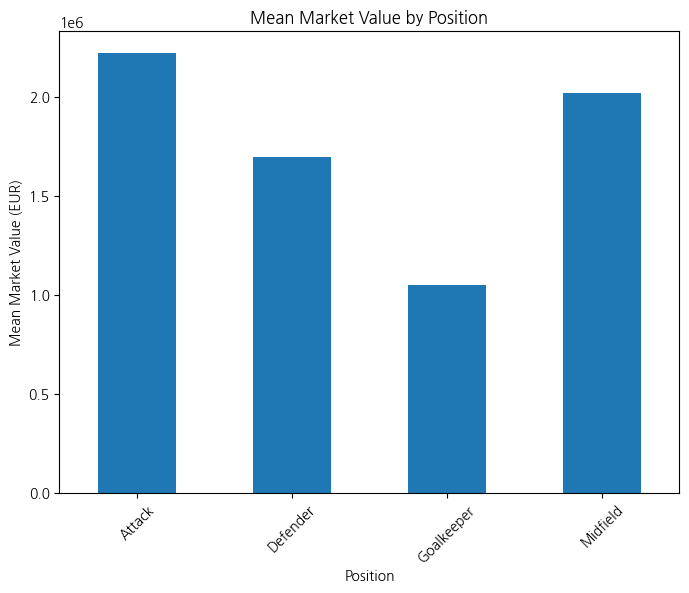

In [ ]:
position_market_values = players_with_val.groupby('position')['market_value_in_eur'].mean()

plt.figure(figsize=(8,6))
position_market_values.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Mean Market Value (EUR)')
plt.title('Mean Market Value by Position')
plt.xticks(rotation=45)
plt.show()


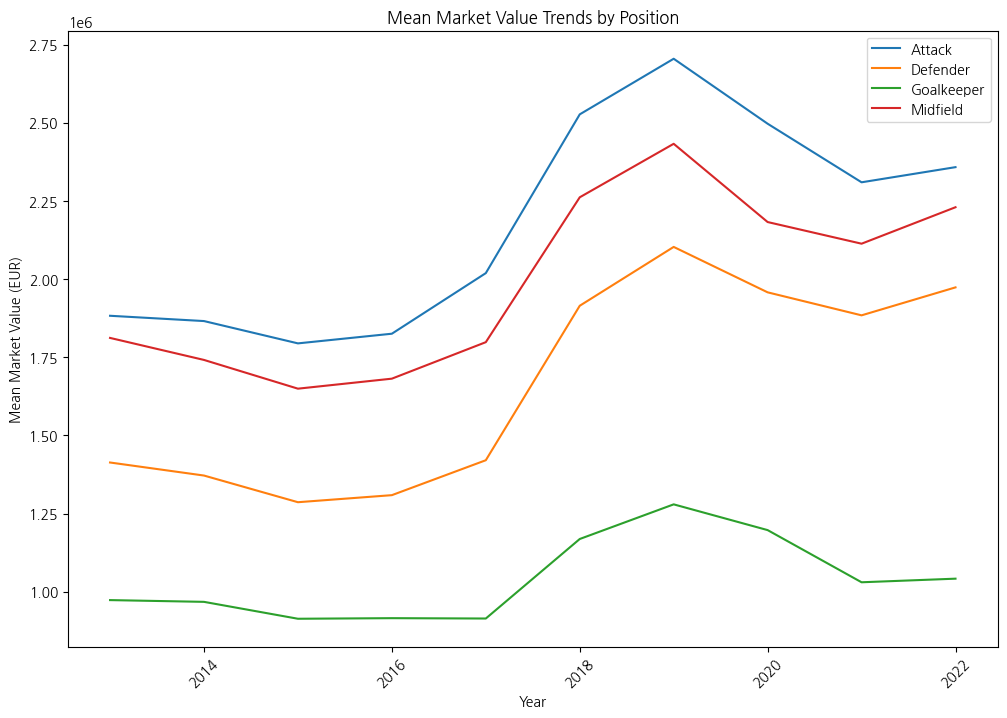

In [ ]:
position_market_values = players_with_val.groupby(['position', 'dateyear'])['market_value_in_eur'].mean()

position_market_values = position_market_values.reset_index()
position_market_values

plt.figure(figsize=(12, 8))
for position in position_market_values['position'].unique():
    position_data = position_market_values[position_market_values['position'] == position]
    plt.plot(position_data['dateyear'], position_data['market_value_in_eur'], label=position)

plt.xlabel('Year')
plt.ylabel('Mean Market Value (EUR)')
plt.title('Mean Market Value Trends by Position')
plt.legend()
plt.xticks(rotation=45)
plt.show()

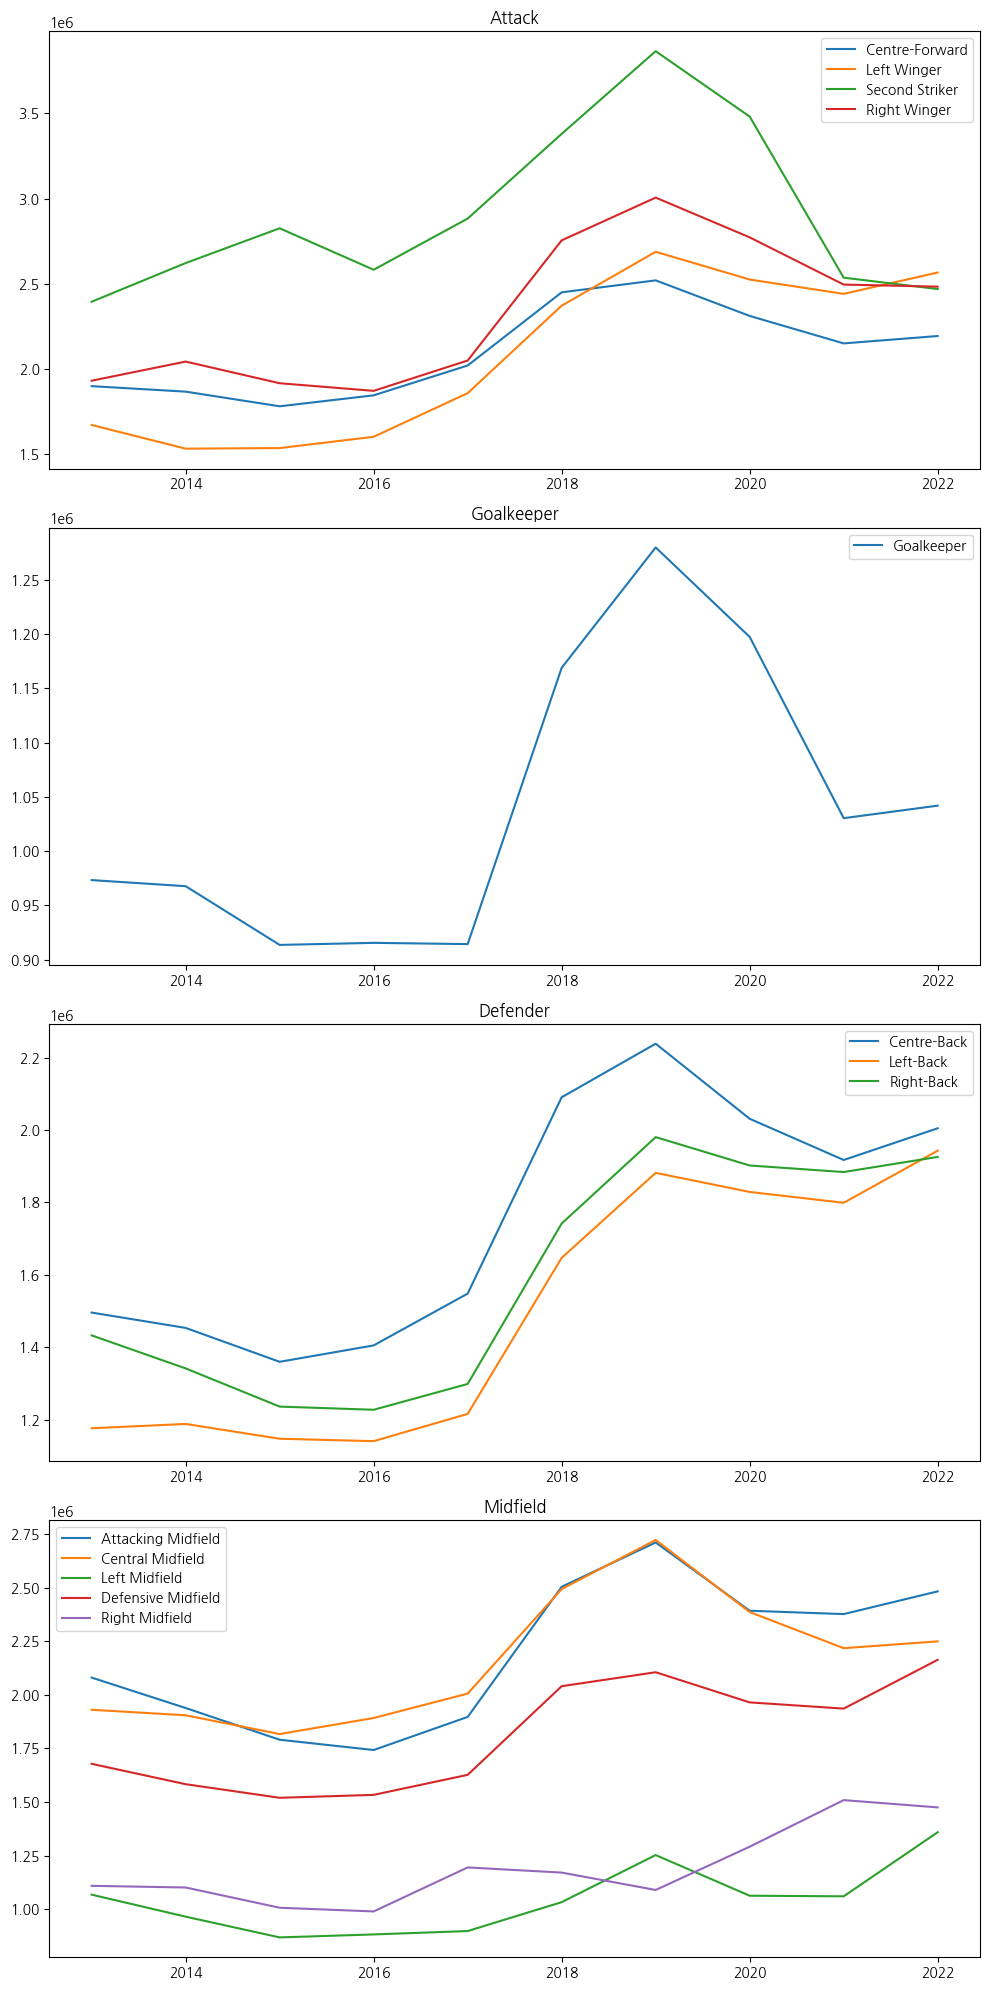

In [ ]:
positions = players_with_val['position'].unique()

fig, axes = plt.subplots(len(positions), figsize=(10, 20))

for i, position in enumerate(positions):
    ax = axes[i]
    ax.set_title(position)

    position_data = players_with_val[players_with_val['position'] == position]
    sub_positions = position_data['sub_position'].unique()

    for sub_position in sub_positions:
        sub_position_data = position_data[position_data['sub_position'] == sub_position]
        sub_position_value = sub_position_data.groupby('dateyear')['market_value_in_eur'].mean()

        ax.plot(sub_position_value.index, sub_position_value.values, label=sub_position)

    ax.legend()

plt.tight_layout()
plt.show()


<ipython-input-84-e8700e28d589>:25: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  plt.tight_layout()
<ipython-input-84-e8700e28d589>:25: UserWarning: Glyph 214 (\N{LATIN CAPITAL LETTER O WITH DIAERESIS}) missing from font(s) NanumGothic.
  plt.tight_layout()
<ipython-input-84-e8700e28d589>:25: UserWarning: Glyph 263 (\N{LATIN SMALL LETTER C WITH ACUTE}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 227 (\N{LATIN SMALL LETTER A WITH TILDE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 214 (\N{LATIN CAPITAL LETTER O WITH DIAERESIS}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 263 (\N{LATIN SMALL LET

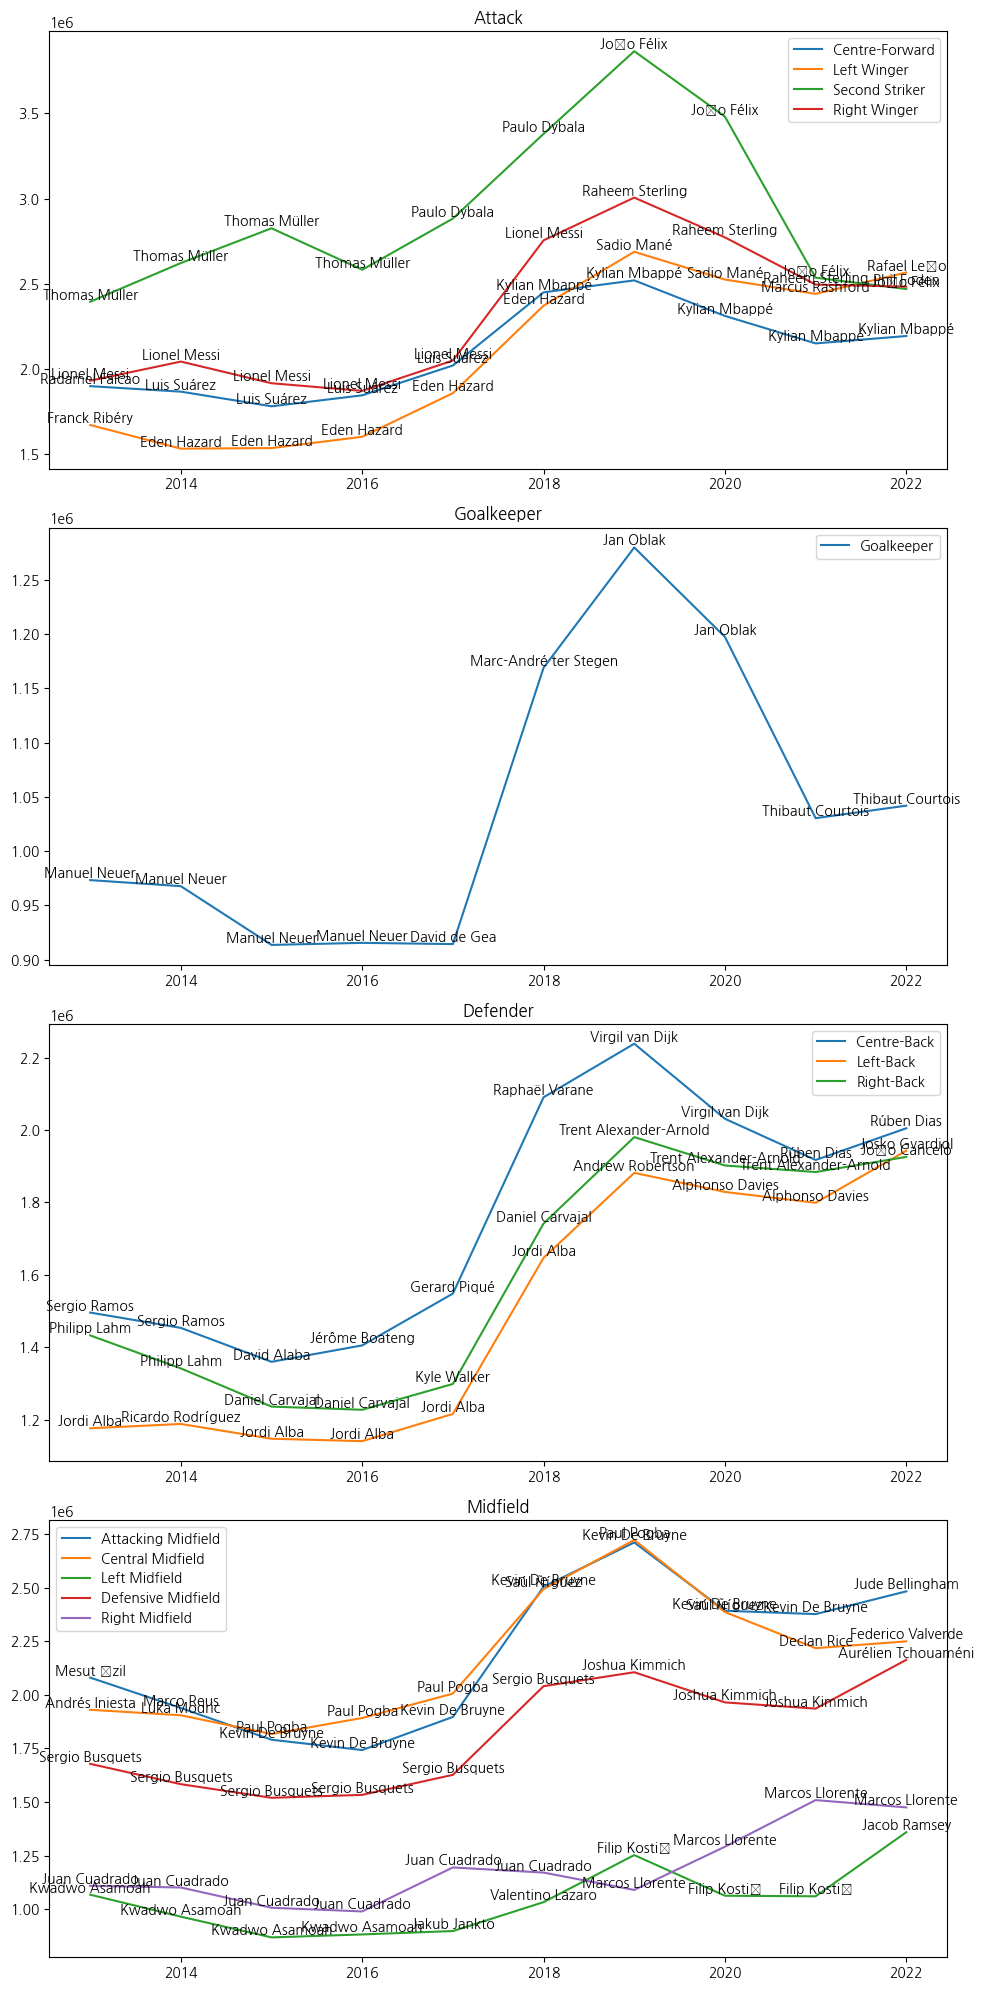

In [ ]:
positions = players_with_val['position'].unique()

fig, axes = plt.subplots(len(positions), figsize=(10, 20))

for i, position in enumerate(positions):
    ax = axes[i]
    ax.set_title(position)

    position_data = players_with_val[players_with_val['position'] == position]
    sub_positions = position_data['sub_position'].unique()

    for sub_position in sub_positions:
        sub_position_data = position_data[position_data['sub_position'] == sub_position]
        sub_position_value = sub_position_data.groupby('dateyear')['market_value_in_eur'].mean()

        ax.plot(sub_position_value.index, sub_position_value.values, label=sub_position)

        top_players = sub_position_data.loc[sub_position_data.groupby('dateyear')['market_value_in_eur'].idxmax(), 'name']

        for year, player in zip(sub_position_value.index, top_players):
            ax.text(year, sub_position_value[year], player, ha='center', va='bottom')

    ax.legend()

plt.tight_layout()
plt.show()
